In [56]:
# Sphere model

import matplotlib.pyplot as plt 
from math import exp
from random import seed
from random import random
import math
 
# Initialize a network

def initialize_network_1(n_inputs, n_outputs):
    network = list()
    output_layer = [{'weights':[random() for _ in range(n_inputs)],
                     'inputs':[0 for _ in range(n_inputs)], 'output':0, 'delta':0,'A':0,'R':0,"C":0} for i in range(n_outputs)]
    network.append(output_layer)
    
    for layer in network:
        db = 0
        for neuron in layer:
            s1 = sum([x*x for x in neuron["weights"]])
            s2 = math.sqrt(s1)
            neuron["weights"] = [x /s2 for x in neuron["weights"] ]
            neuron["A"] = .2 + 0.6*random()
            neuron["R"] = .2 + 1.8*random()
            neuron["C"] = db
            db = db + 1
            
    
    return network


def initialize_network_2(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for _ in range(n_inputs)],
                     'inputs':[0 for _ in range(n_inputs)], 'output':0, 'delta':0,'A':0,'R':0} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for _ in range(n_hidden)],
                     'inputs':[0 for _ in range(n_hidden)], 'output':0, 'delta':0,'A':0,'R':0} for i in range(n_outputs)]
    network.append(output_layer)
    
    for layer in network:
        for neuron in layer:
            s1 = sum([x*x for x in neuron["weights"]])
            s2 = math.sqrt(s1)
            neuron["weights"] = [x /s2 for x in neuron["weights"] ]
            neuron["A"] = .2 + 0.6*random()
            neuron["R"] = .2 + 1.8*random()
            
    
    return network
 
# Calculate neuron activation for an input
def activate(neuron):
    N = len(neuron["weights"])
    y1 = sum([neuron["inputs"][i]*neuron["inputs"][i] for i in range(N) ])
    y2 = sum([neuron["inputs"][i]*neuron["weights"][i] for i in range(N) ])
    activation = - (y1 - 2*(neuron["A"] + neuron["R"])*y2 + neuron["A"]*neuron["A"] + 2*neuron["A"]*neuron["R"])
    return activation
 
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Calculate the derivative of an neuron output
def transfer_derivative(neuron):
    return neuron['output'] * (1.0 - neuron['output'])

# Calculate the derivative of the activation function
def activation_derivate_by_input(neuron, idx):
    return 2*neuron['inputs'][idx] - 2*(neuron["A"] + neuron["R"])*neuron["weights"][idx]

def activation_derivate_by_weight(neuron, idx):
    return  - 2*(neuron["A"] + neuron["R"])*neuron["inputs"][idx]

def activation_derivate_by_A(neuron):
    N = len(neuron["inputs"])
    s1 = sum([neuron["inputs"][i]*neuron["weights"][i] for i in range(N)])
    return -2*s1 + 2*(neuron["A"] + neuron["R"])

def activation_derivate_by_R(neuron):
    N = len(neuron["inputs"])
    s1 = sum([neuron["inputs"][i]*neuron["weights"][i] for i in range(N)])
    return -2*s1 + 2*(neuron["A"])
              
              
# Forward propagate input to a network output
def forward_propagate(network, row):
    for neuron in network[0]:
        for i in range(len(row)-1):
            neuron['inputs'][i] = row[i]
            
    for l in range(len(network)):
        layer = network[l]
        for neuron in layer:
            activation = activate(neuron)
            neuron['output'] = transfer(activation)
        if l < len(network)-1:
            for neuron in network[l+1]:
                for i in range(len(network[l])):
                    neuron['inputs'][i] = network[l][i]["output"]
            
        outputs = []
        for neuron in network[-1]:
            outputs.append(neuron["output"])
    return outputs
 

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (activation_derivate_by_input(neuron, j) * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron)
 
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        for neuron in network[i]:
            for j in range(len(neuron["weights"])):
                neuron['weights'][j] -= l_rate * neuron['delta'] * activation_derivate_by_weight(neuron, j)
            neuron['A'] -= l_rate * neuron['delta']*activation_derivate_by_A(neuron)
            neuron['R'] -= l_rate * neuron['delta']*activation_derivate_by_R(neuron)
            s1 = sum([x*x for x in neuron["weights"]])
            s2 = math.sqrt(s1)
            neuron["weights"] = [x /s2 for x in neuron["weights"] ]
            print (neuron["weights"], neuron["A"],neuron["R"])

 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        if epoch % 5 == 0:
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            sn = network[-1][0]
            cc = plt.Circle( ((sn["A"]+sn["R"])*sn["weights"][0], (sn["A"]+sn["R"])*sn["weights"][1] ), sn["R"] ,fill = False,color="blue" )   
            axes.add_artist( cc)    
            sn = network[-1][1]
            cc = plt.Circle( ((sn["A"]+sn["R"])*sn["weights"][0], (sn["A"]+sn["R"])*sn["weights"][1] ), sn["R"] ,fill = False,color="red" )   
            axes.add_artist( cc)    
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                print (cl)
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.1 ,fill = True, color =cl )   
                axes.add_artist( cc)        

            plt.xlim( -2 ,8 ) 
            plt.ylim( -2 , 8) 
            plt.title( 'Circle' ) 
            plt.show()
 


[0.1613496795084338, 0.9868973000887811] 0.49928451183850053 1.01248645810875
[0.9895198796534342, 0.14439670276932648] 0.5890380266059398 1.5567838801987484
[0.2995366157922261, 0.9540848053499964] 0.8576158635273711 1.4595765849483282
[0.994581481905969, 0.10395997234381456] 0.5933412869887403 1.5476697058277886
[0.29973592721563835, 0.9540222083034449] 0.8577520185331984 1.459781217831563
[0.9945814819059721, 0.10395997234378579] 0.5933412869887347 1.5476697058277777
[0.3391151967227126, 0.9407448556073617] 0.8628087268099802 1.503282469195694
[0.9810245615697544, -0.19388349490575854] 0.6808743045602701 1.5387343182615896
[0.43091156335981884, 0.9023941625269951] 0.9412368826928139 1.6224157473217102
[0.9810245595545286, -0.1938835051025309] 0.6808743042910653 1.5387343159582565
[0.43091156335981884, 0.9023941625269951] 0.9412368826928139 1.6224157473217102
[0.9810245595545288, -0.19388350510253047] 0.6808743042910655 1.5387343159582567
[0.43091156335934666, 0.9023941625272206] 0.9

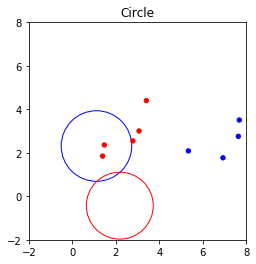

[0.6167852122690451, 0.7871315023083686] 1.7620951456251062 2.5536289342576324
[0.9810243680083369, -0.19388447429808092] 0.6808766113749524 1.538736379151286
[0.6164705559653545, 0.7873779611011265] 1.7616226249315718 2.553938918030397
[0.9810166286226133, -0.19392363024118967] 0.6808851828309528 1.5387343144644514
[0.6164644952281548, 0.787382706263667] 1.761680906880895 2.554116349099337
[0.9810166286226133, -0.19392363024118967] 0.6808851828309528 1.5387343144644514
[0.615657576112843, 0.7880137999901136] 1.7518148744929176 2.5576897883573584
[0.9801938463120149, -0.19804045963403086] 0.6819968277206879 1.5384534118029203
[0.6156651083419034, 0.7880079151698619] 1.7518146600598357 2.557699627935522
[0.9801938445069328, -0.19804046856821647] 0.6819968275037352 1.5384534098083396
[0.6156651083419024, 0.7880079151698627] 1.7518146600598354 2.5576996279355217
[0.9801938445069329, -0.19804046856821603] 0.6819968275037355 1.5384534098083398
[0.5317664515691839, 0.8468910443413125] 1.7543

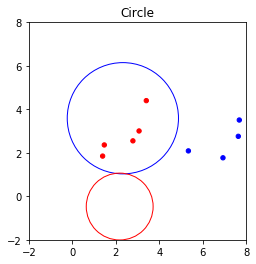

[0.5426680737517934, 0.8399472374682341] 1.7161350638225596 2.558154833397777
[0.9772922383917841, -0.21189591968505692] 0.6857912196159207 1.5375851360350898
[0.542636238717117, 0.8399678044014186] 1.7158751803460253 2.5583414269742604
[0.9772868062063176, -0.21192097209822208] 0.685796906240333 1.5375840539089656
[0.5427631302819239, 0.8398858162908619] 1.7159722221950946 2.5586331742915873
[0.9772868062063176, -0.21192097209822208] 0.685796906240333 1.5375840539089656
[0.5450278310067291, 0.8384179527109974] 1.708355468663178 2.561445098480219
[0.9766507774695566, -0.2148330953743176] 0.6866034466980404 1.5374119448037733
[0.5450656692859654, 0.838393354080197] 1.708354569298656 2.5614732858077036
[0.9766507763241544, -0.21483310058141977] 0.6866034466160669 1.5374119436961386
[0.5450656692859654, 0.838393354080197] 1.708354569298656 2.5614732858077036
[0.9766507763241545, -0.21483310058141947] 0.686603446616067 1.5374119436961389
[0.5440901893763552, 0.8390267372523965] 1.708323853

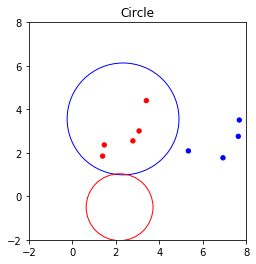

[0.547455658730412, 0.8368346919936163] 1.6813914097610114 2.5718375334280545
[0.9743366728569595, -0.22509564173042157] 0.68947896081797 1.5368514622328553
[0.5474235588779675, 0.8368556907767196] 1.681192617839678 2.571986615524436
[0.9743325202552394, -0.22511361569899224] 0.6894831495215965 1.5368508115468784
[0.5475323098473752, 0.8367845419659697] 1.6812842276704754 2.572259762538335
[0.9743325202552394, -0.22511361569899224] 0.6894831495215965 1.5368508115468784
[0.5490911017306945, 0.8357625033465979] 1.675581122005578 2.5743932605773794
[0.9738106793643692, -0.22736042038117746] 0.6901174158404274 1.5367333822855977
[0.5491207653012921, 0.8357430137996508] 1.6755806167998943 2.5744163685140666
[0.973810678556752, -0.22736042384029434] 0.6901174158079861 1.5367333815766062
[0.5491207653012922, 0.8357430137996509] 1.6755806167998943 2.5744163685140666
[0.9738106785567522, -0.22736042384029412] 0.6901174158079862 1.5367333815766064
[0.5477287854611581, 0.8366559493467101] 1.67553

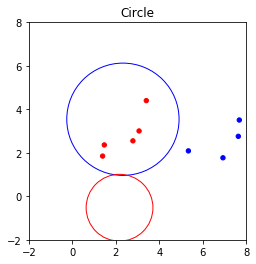

[0.5480563263907099, 0.8364414283756633] 1.6545469802985144 2.5821433485877385
[0.971876107700176, -0.2354927414625681] 0.6924367823791117 1.5363398167839022
[0.5480293434339722, 0.8364591076288962] 1.654385798973774 2.5822684034110193
[0.9718727644280796, -0.23550653868400903] 0.6924400646408854 1.5363393934082055
[0.5481339496950777, 0.8363905625912298] 1.6544762658307504 2.5825365901299953
[0.9718727644280796, -0.23550653868400903] 0.6924400646408854 1.5363393934082055
[0.5493767281142323, 0.8355747785844789] 1.649892073630171 2.5842837942303243
[0.9714285931455616, -0.237332021478845] 0.692963328450779 1.536253941334345
[0.5494031598153748, 0.8355573995752068] 1.64989175273796 2.5843047112494126
[0.9714285925376934, -0.23733202396692277] 0.6929633284400494 1.5362539408395874
[0.5494031598153748, 0.8355573995752068] 1.64989175273796 2.5843047112494126
[0.9714285925376934, -0.23733202396692252] 0.6929633284400495 1.5362539408395877
[0.5478832033784538, 0.8365548370882592] 1.649837035

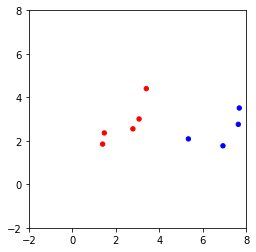

In [59]:
# Test training backprop algorithm
seed(1)
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(T[0]) - 1
n_outputs = len(set([row[-1] for row in T]))
#network = initialize_network_2(n_inputs, 2, n_outputs)
network = initialize_network_1(n_inputs,  n_outputs)
train_network(network, T, 0.5, 20, n_outputs)
#for layer in network:
#	print(layer)
figure, axes = plt.subplots()
axes.set_aspect( 1 ) 
plt.xlim( -2 ,8 ) 
plt.ylim( -2 , 8) 
for i in range(len(T)):
    cl = 'blue' if T[i][2] > 0 else 'red'
    cc = plt.Circle( (T[i][0], T[i][1] ), 0.1 ,fill = True, color =cl )   
    axes.add_artist( cc)     


In [32]:
# Linear model

import matplotlib.pyplot as plt 
from math import exp
from random import seed
from random import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for _ in range(n_inputs + 1)],
                     'inputs':[0 for _ in range(n_inputs)], 'output':0, 'delta':0} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for _ in range(n_hidden + 1)],
                     'inputs':[0 for _ in range(n_hidden)], 'output':0, 'delta':0} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
# Calculate neuron activation for an input
def activate(neuron):
	activation = neuron['weights'][-1]
	for i in range(len(neuron['weights'])-1):
		activation += neuron['weights'][i] * neuron['inputs'][i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Calculate the derivative of an neuron output
def transfer_derivative(neuron):
    return neuron['output'] * (1.0 - neuron['output'])


# Calculate the derivative of the activation function
def activation_derivate_by_input(neuron, idx):
    return neuron['weights'][idx]

def activation_derivate_by_weight(neuron, idx):
    return neuron['inputs'][idx]

# Forward propagate input to a network output
def forward_propagate(network, row):
    for neuron in network[0]:
        for i in range(len(row)-1):
            neuron['inputs'][i] = row[i]
            
    for l in range(len(network)):
        layer = network[l]
        for neuron in layer:
            activation = activate(neuron)
            neuron['output'] = transfer(activation)
        if l < len(network)-1:
            for neuron in network[l+1]:
                for i in range(len(network[l])):
                    neuron['inputs'][i] = network[l][i]["output"]
            
        outputs = []
        for neuron in network[-1]:
            outputs.append(neuron["output"])
    return outputs
 

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (activation_derivate_by_input(neuron, j) * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron)
 
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		for neuron in network[i]:
			for j in range(len(neuron["inputs"])):
				neuron['weights'][j] += l_rate * neuron['delta'] * activation_derivate_by_weight(neuron, j)
			neuron['weights'][-1] += l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
 


>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
[{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'inputs': [7.673756466, 3.508563011], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'inputs': [7.673756466, 3.508563011

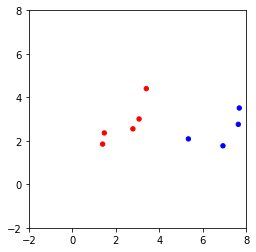

In [33]:
# Test training backprop algorithm
seed(1)
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(T[0]) - 1
n_outputs = len(set([row[-1] for row in T]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, T, 0.5, 20, n_outputs)
for layer in network:
	print(layer)
figure, axes = plt.subplots()
axes.set_aspect( 1 ) 
plt.xlim( -2 ,8 ) 
plt.ylim( -2 , 8) 
for i in range(len(T)):
    cl = 'blue' if T[i][2] > 0 else 'red'
    cc = plt.Circle( (T[i][0], T[i][1] ), 0.1 ,fill = True, color =cl )   
    axes.add_artist( cc)     


In [25]:
print (neuron['inputs'], row)
for i in range(len(row)):
    neuron['inputs'][i] = row[i]

[0.5, 0.6, 0.7] [0.5, 0.6, 0.7]


In [16]:
import matplotlib.pyplot as plt 
from math import exp
from random import seed
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)],
                     'inputs':[0 for i in range(n_inputs)], 'output':0, 'delta':0} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)],
                     'inputs':[0 for i in range(n_hidden)], 'output':0, 'delta':0} for i in range(n_outputs)]
	network.append(output_layer)
	return network

def activate(neuron):
	activation = neuron['weights'][-1]
	for i in range(len(neuron['weights'])-1):
		activation += neuron['weights'][i] * neuron['inputs'][i]
	return activation

def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

def forward_propagate(network, row):
    for neuron in network[0]:
        for i in range(len(row)):
            neuron['inputs'][i] = row[i]
            
    for l in range(len(network)):
        layer = network[l]
        for neuron in layer:
            activation = activate(neuron)
            neuron['output'] = transfer(activation)
        if l < len(network)-1:
            for neuron in network[l+1]:
                for i in range(len(network[l])):
                    neuron['inputs'][i] = network[l][i]["output"]
            
        outputs = []
        for neuron in network[-1]:
            outputs.append(neuron["output"])
    return outputs

In [18]:
network = initialize_network(3, 3, 2)
row = [.5,.6,.7]
out = forward_propagate(network, row)
print (out)

[0.9292503480872945, 0.8327351731899971]


In [12]:
print (network[0])

[{'weights': [0.10006762741055752, 0.8447042919997182, 0.18170240663825388, 0.8759220004779279], 'inputs': [0, 0, 0], 'output': 0, 'delta': 0}, {'weights': [0.23292078440189878, 0.29671656560687276, 0.7096207079228088, 0.9821899049324214], 'inputs': [0, 0, 0], 'output': 0, 'delta': 0}, {'weights': [0.5093592704483646, 0.5644310181899835, 0.6928349906178054, 0.92527004046846], 'inputs': [0, 0, 0], 'output': 0, 'delta': 0}]


In [7]:
row = [.5,.6,.7]


[{'weights': [0.6738610621451352, 0.6807532457649631, 0.8463959263099339, 0.781291492208344], 'inputs': [0.5, 0.6, 0.7], 'output': 0, 'delta': 0}, {'weights': [0.29545850149798536, 0.30546475112944405, 0.6435046761448059, 0.9644993965347383], 'inputs': [0.5, 0.6, 0.7], 'output': 0, 'delta': 0}, {'weights': [0.46375099648629126, 0.7241938547947231, 0.7323161615572665, 0.3820160397521203], 'inputs': [0.5, 0.6, 0.7], 'output': 0, 'delta': 0}]
